<a href="https://colab.research.google.com/github/mdaffaadr/MyPortfolio/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
df=pd.read_csv("/content/ENGLAND-Football-Dataset[1].csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21801 entries, 0 to 21800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tournament     21801 non-null  object 
 1   home           21801 non-null  object 
 2   home_goal      21801 non-null  float64
 3   away_goal      21801 non-null  float64
 4   away           21801 non-null  object 
 5   home_corner    21801 non-null  float64
 6   away_corner    21801 non-null  float64
 7   home_attack    17113 non-null  float64
 8   away_attack    17113 non-null  float64
 9   home_shots     17154 non-null  float64
 10  away_shots     17142 non-null  float64
 11  time           21801 non-null  object 
 12  date           21801 non-null  object 
 13  ht_diff        21801 non-null  float64
 14  at_diff        21801 non-null  float64
 15  ht_result      21801 non-null  object 
 16  at_result      21801 non-null  object 
 17  total_corners  21801 non-null  float64
dtypes: flo

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='home_corner', y='away_corner', marginal='box', nbins=50,
                   labels={'home_corner': 'Home Corners', 'away_corner': 'Away Corners'},
                   color_discrete_sequence=['#636EFA'], opacity=0.8)

fig.update_layout(title='Distribution of Corners for Home and Away Teams',
                  xaxis_title='Number of Corners', yaxis_title='Count')

fig.show()

In [ ]:
fig = px.scatter(df, x='home_shots', y='home_goal', color='tournament',
                 labels={'home_shots': 'Home Shots', 'home_goal': 'Home Goals'})

fig.update_layout(title='Number of Shots vs. Goals Scored for Home Teams',
                  xaxis_title='Number of Shots', yaxis_title='Number of Goals')

fig.show()

In [ ]:
tournament_counts = df.groupby('tournament').size().reset_index(name='count')

fig = px.bar(tournament_counts, x='tournament', y='count',
             labels={'tournament': 'Tournament', 'count': 'Number of Matches'},
             color_discrete_sequence=['#636EFA'], opacity=0.8)

fig.update_layout(title='Number of Matches by Tournament')

fig.show()


In [ ]:
corners = pd.concat([df[['home', 'home_corner']].rename(columns={'home': 'team', 'home_corner': 'corners'}),
                     df[['away', 'away_corner']].rename(columns={'away': 'team', 'away_corner': 'corners'})])

fig = px.histogram(corners, x='corners', color='team', nbins=50,
                   labels={'corners': 'Number of Corners', 'team': 'Team'},
                   color_discrete_sequence=['#636EFA', '#EF553B'], opacity=0.8)

fig.update_layout(title='Distribution of Corners for Home and Away Teams',
                  xaxis_title='Number of Corners', yaxis_title='Count')

fig.show()

In [ ]:
fig = px.scatter(df, x='home_shots', y='home_goal',
                 labels={'home_shots': 'Number of Shots', 'home_goal': 'Number of Goals'},
                 trendline='ols', opacity=0.8)

fig.update_layout(title='Number of Shots vs. Number of Goals Scored (Home Team)')

fig.show()

In [ ]:
home_shots = df.groupby('home')['home_shots'].mean()

away_shots = df.groupby('away')['away_shots'].mean()

avg_shots = pd.concat([home_shots, away_shots]).groupby(level=0).mean()

max_shots = avg_shots.idxmax()

print(f"The team with the highest average number of shots per match is {max_shots} with {avg_shots[max_shots]:.2f} shots per match.")


In [ ]:
home_shots = df.groupby('home')['home_shots'].mean()

away_shots = df.groupby('away')['away_shots'].mean()

avg_shots = pd.concat([home_shots, away_shots]).groupby(level=0).mean()

fig = px.bar(avg_shots, x=avg_shots.index, y=avg_shots.values,
             labels={'x': 'Team', 'y': 'Average Shots per Match'},
             color=avg_shots.index, color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Average Number of Shots per Match by Team')

fig.update_layout(xaxis={'categoryorder': 'total descending

fig.show()

In [ ]:
df.loc[df['tournament'] == 'Premier League']

,tournament,home,home_goal,away_goal,away,home_corner,away_corner,home_attack,away_attack,home_shots,away_shots,time,date,ht_diff,at_diff,ht_result,at_result,total_corners
0,Premier League,Arsenal,0.0,0.0,Chelsea,0.0,0.0,NaN,NaN,NaN,NaN,20:00:00,2023-05-02,0.0,0.0,DRAW,DRAW,0.0
1,Premier League,Leicester,0.0,0.0,Everton,0.0,0.0,NaN,NaN,NaN,NaN,20:00:00,2023-05-01,0.0,0.0,DRAW,DRAW,0.0
2,Premier League,Liverpool,0.0,0.0,Tottenham,0.0,0.0,NaN,NaN,NaN,NaN,16:30:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
3,Premier League,Bournemouth,0.0,0.0,Leeds,0.0,0.0,NaN,NaN,NaN,NaN,14:00:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
4,Premier League,Fulham,0.0,0.0,Man City,0.0,0.0,NaN,NaN,NaN,NaN,14:00:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,Premier League,Newcastle,0.0,3.0,Sunderland,7.0,3.0,NaN,NaN,NaN,NaN,12:45:00,2014-02-01,-3.0,3.0,LOST,WON,10.0
3348,Premier League,Stoke,3.0,5.0,Liverpool,10.0,2.0,NaN,NaN,NaN,NaN,16:10:00,2014-01-12,-2.0,2.0,LOST,WON,12.0
3349,Premier League,Fulham,1.0,4.0,Sunderland,10.0,5.0,NaN,NaN,NaN,NaN,15:00:00,2014-01-11,-3.0,3.0,LOST,WON,15.0
3350,Premier League,Stoke,1.0,0.0,Everton,1.0,5.0,NaN,NaN,NaN,NaN,15:00:00,2014-01-01,1.0,-1.0,WON,LOST,6.0


In [ ]:
data=df

grouped_data = data.groupby(['home', 'tournament'])

team_performance = grouped_data[['home_goal', 'away_goal', 'home_corner', 'away_corner']].mean()

print(team_performance)

                                            home_goal  away_goal  home_corner  \
home               tournament                                                   
AFC Fylde          England National League   1.791045   1.149254     6.119403   
AFC Wimbledon      England League 1          1.215385   1.392308     5.423077   
                   England League 2          1.300000   1.128571     5.457143   
Accrington Stanley England League 1          1.361905   1.428571     4.971429   
                   England League 2          1.677419   1.182796     5.591398   
...                                               ...        ...          ...   
Yeovil             England League 1          0.739130   1.434783     5.913043   
                   England League 2          1.054348   1.206522     4.706522   
                   England National League   1.223529   1.117647     4.917647   
York               England League 2          1.022727   1.250000     5.840909   
                   England N

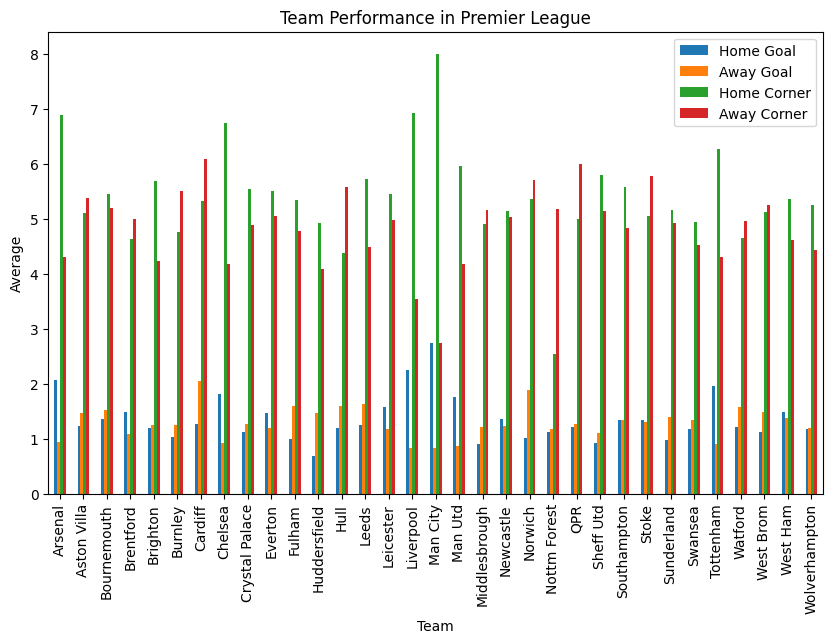

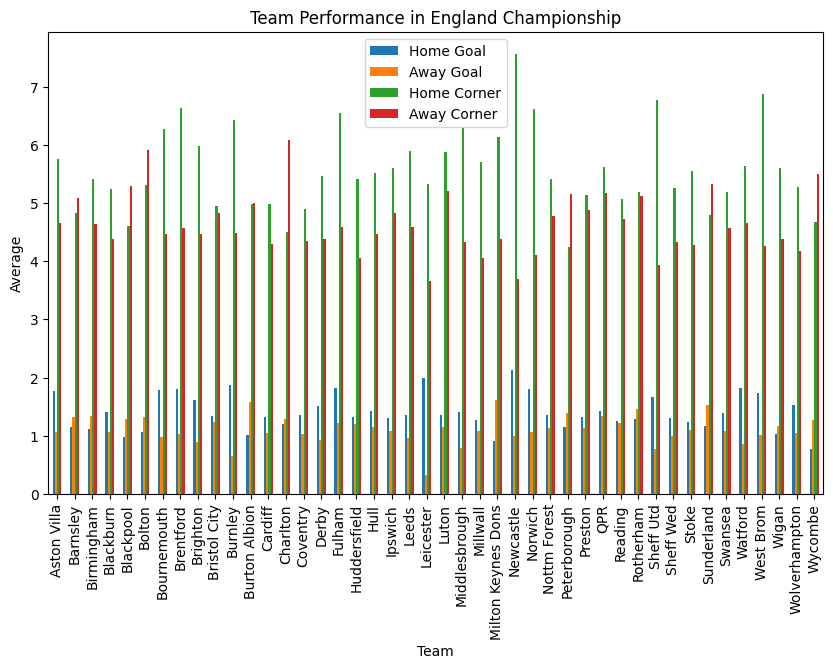

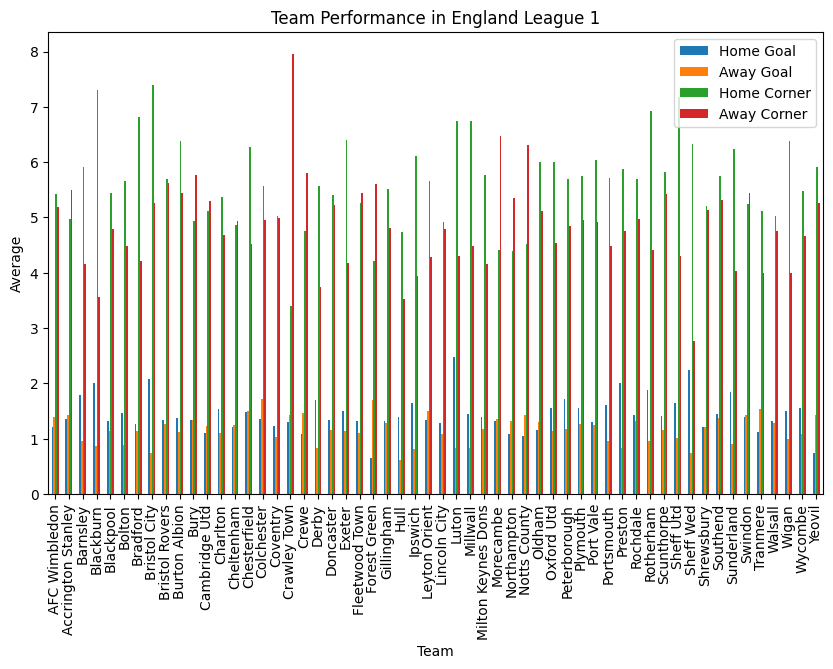

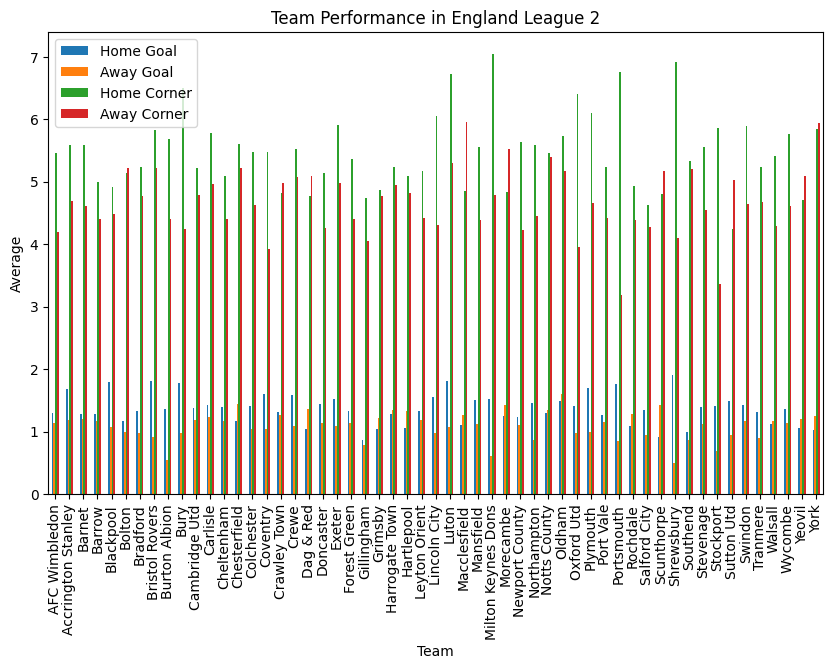

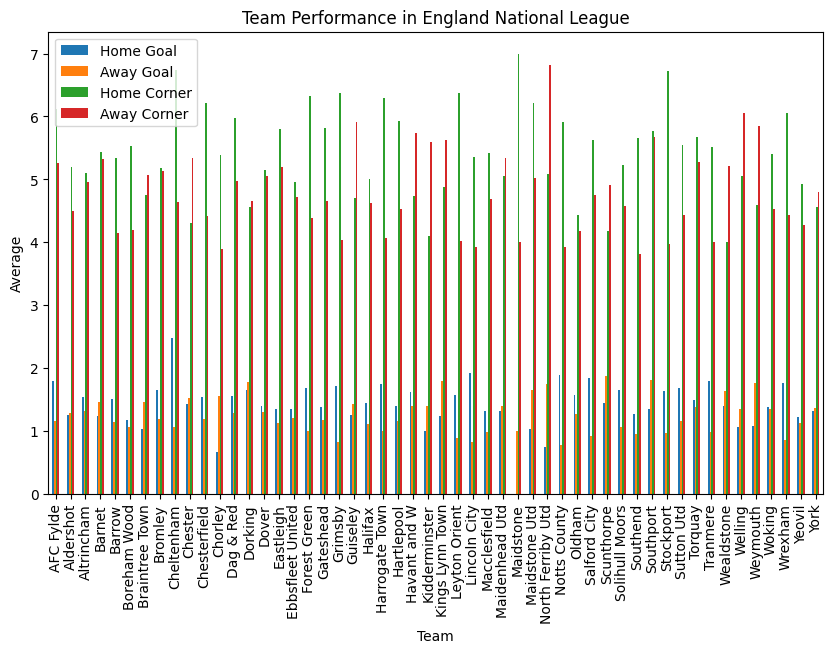

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

tournaments = data['tournament'].unique()


for tournament in tournaments:

    tournament_data = data[data['tournament'] == tournament]

    grouped_data = tournament_data.groupby(['home'])

    team_performance = grouped_data[['home_goal', 'away_goal', 'home_corner', 'away_corner']].mean()

    team_performance.plot(kind='bar', figsize=(10, 6))

    plt.xlabel('Team')
    plt.ylabel('Average')
    plt.title(f'Team Performance in {tournament}')
    plt.legend(['Home Goal', 'Away Goal', 'Home Corner', 'Away Corner'])
    plt.show()

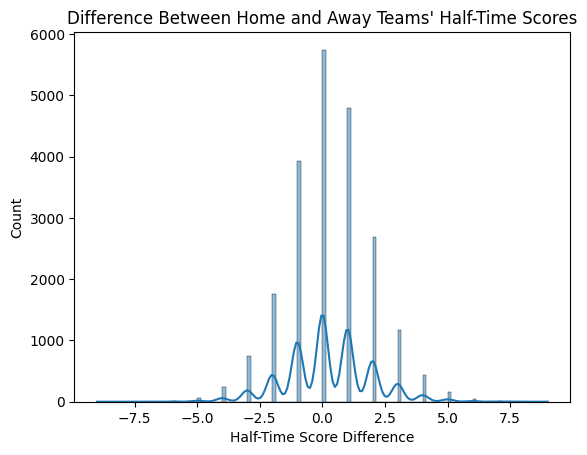

In [ ]:
import seaborn as sns

data['ht_diff'] = data['home_goal'] - data['away_goal']

sns.histplot(data=data, x='ht_diff', kde=True)

plt.title('Difference Between Home and Away Teams\' Half-Time Scores')

plt.xlabel('Half-Time Score Difference')

plt.ylabel('Count')

plt.show()